## UTILIZING MACHINE LEARNING FOR FORECASTING THE PRICE OF COMMODITIES

## MScFE Capstone Project (Group 4867)

## 1. Machine Learning Approach to Gold Price Forecasting

## Introduction

Gold is a highly traded commodity which has gained interest by many investors and traders for centuries. The can also be liken
to an asset that is used to store the value for money. Asides its use case as a value to store money, countries cantral banks use
it as means to store wealth, repay debts and strengthing the financial capacity of a country.

These factors of Gold has made it the precious metal commodity that is traded and attracted by all. The emergence of machine learning 
has been critical tool to help guild investors in making informed decision on when to buy or sell Gold.

In this project, we are going to be applying some key machine learning algorithm in predicting the price of Gold and comparing the result 
model results.

## Project Flow Chart

![Project Flow Chart](flow2.png)

In [378]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.svm import SVR
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

import warnings
warnings.filterwarnings('ignore')

All our datasets are imported from yfinance using historical data of 18 years from **January 2005** to **December 2023** to train and test our models. 
This project uses Gold spot price as a choice for Gold commdity price forecating. We also integrated SP500, Dow_Jones and US_Dollar Index to see how strongly they impact the pricing of Gold.

In [409]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols
tickers = {
    'Gold': 'GC=F',
    'SP500': '^GSPC',
    'Dow_Jones': '^DJI',
    'US_Dollar_Index': 'DX-Y.NYB'
   
}

# Define the start and end dates
start_date = '2005-01-01'
end_date = '2023-12-31'

# Initialize an empty DataFrame for the consolidated data
consolidated_data = pd.DataFrame()

# Download the stock data
for name, symbol in tickers.items():
    print(f"Downloading data for {name}...")
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        # Rename columns to include the ticker name
        data.rename(columns={col: f"{name}_{col}" for col in data.columns}, inplace=True)
        if consolidated_data.empty:
            consolidated_data = data
        else:
            # Merge with the consolidated DataFrame
            consolidated_data = consolidated_data.join(data, how='outer')
        print(f"Data for {name} downloaded.")
    except Exception as e:
        print(f"Failed to download data for {name}: {e}")

# Save the consolidated data to a CSV file
consolidated_data.to_csv('Gold_Data.csv')
print("Consolidated data saved ")


[*********************100%***********************]  1 of 1 completed
Data for Gold downloaded.
[*********************100%***********************]  1 of 1 completed
Data for SP500 downloaded.
[*********************100%***********************]  1 of 1 completed
Data for Dow_Jones downloaded.
[*********************100%***********************]  1 of 1 completed
Data for US_Dollar_Index downloaded.
Consolidated data saved 


In [410]:
data = pd.read_csv("Gold_Data.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)


In [411]:
data.head()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,Dow_Jones_Low,Dow_Jones_Close,Dow_Jones_Adj Close,Dow_Jones_Volume,US_Dollar_Index_Open,US_Dollar_Index_High,US_Dollar_Index_Low,US_Dollar_Index_Close,US_Dollar_Index_Adj Close,US_Dollar_Index_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,431.000000,431.000000,431.000000,428.700012,428.700012,4.0,1211.920044,1217.800049,1200.319946,1202.079956,...,10710.070312,10729.429688,10729.429688,270620000.0,81.050003,81.760002,80.769997,81.300003,81.300003,0.0
2005-01-04,428.500000,428.500000,428.500000,428.500000,428.500000,108.0,1202.079956,1205.839966,1185.390015,1188.050049,...,10605.150391,10630.780273,10630.780273,293280000.0,81.360001,82.709999,81.180000,82.570000,82.570000,0.0
2005-01-05,425.700012,425.700012,425.700012,426.600006,426.600006,2.0,1188.050049,1192.729980,1183.719971,1183.739990,...,10597.750000,10597.830078,10597.830078,263550000.0,82.489998,82.919998,82.300003,82.540001,82.540001,0.0
2005-01-06,421.000000,421.000000,421.000000,421.000000,421.000000,1.0,1183.739990,1191.630005,1183.270020,1187.890015,...,10589.330078,10622.879883,10622.879883,232850000.0,82.449997,83.230003,82.430000,83.150002,83.150002,0.0
2005-01-07,423.700012,423.700012,418.700012,418.899994,418.899994,1.0,1187.890015,1192.199951,1182.160034,1186.189941,...,10571.740234,10603.959961,10603.959961,283770000.0,83.070000,83.790001,82.610001,83.610001,83.610001,0.0


In [412]:
data.dropna(inplace=True)

In [413]:
data.head()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,Dow_Jones_Low,Dow_Jones_Close,Dow_Jones_Adj Close,Dow_Jones_Volume,US_Dollar_Index_Open,US_Dollar_Index_High,US_Dollar_Index_Low,US_Dollar_Index_Close,US_Dollar_Index_Adj Close,US_Dollar_Index_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,431.000000,431.000000,431.000000,428.700012,428.700012,4.0,1211.920044,1217.800049,1200.319946,1202.079956,...,10710.070312,10729.429688,10729.429688,270620000.0,81.050003,81.760002,80.769997,81.300003,81.300003,0.0
2005-01-04,428.500000,428.500000,428.500000,428.500000,428.500000,108.0,1202.079956,1205.839966,1185.390015,1188.050049,...,10605.150391,10630.780273,10630.780273,293280000.0,81.360001,82.709999,81.180000,82.570000,82.570000,0.0
2005-01-05,425.700012,425.700012,425.700012,426.600006,426.600006,2.0,1188.050049,1192.729980,1183.719971,1183.739990,...,10597.750000,10597.830078,10597.830078,263550000.0,82.489998,82.919998,82.300003,82.540001,82.540001,0.0
2005-01-06,421.000000,421.000000,421.000000,421.000000,421.000000,1.0,1183.739990,1191.630005,1183.270020,1187.890015,...,10589.330078,10622.879883,10622.879883,232850000.0,82.449997,83.230003,82.430000,83.150002,83.150002,0.0
2005-01-07,423.700012,423.700012,418.700012,418.899994,418.899994,1.0,1187.890015,1192.199951,1182.160034,1186.189941,...,10571.740234,10603.959961,10603.959961,283770000.0,83.070000,83.790001,82.610001,83.610001,83.610001,0.0


In [414]:
data.shape

(4772, 24)

In [415]:
data.describe()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,Dow_Jones_Low,Dow_Jones_Close,Dow_Jones_Adj Close,Dow_Jones_Volume,US_Dollar_Index_Open,US_Dollar_Index_High,US_Dollar_Index_Low,US_Dollar_Index_Close,US_Dollar_Index_Adj Close,US_Dollar_Index_Volume
count,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,...,4772.000000,4772.000000,4772.000000,4.772000e+03,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4.772000e+03
mean,1283.764690,1290.291744,1276.855826,1283.640633,1283.640633,4912.339271,2192.681407,2205.149749,2179.384124,2193.096567,...,18798.106618,18913.632983,18913.632983,2.455666e+08,88.971595,89.299331,88.663502,88.984120,88.984120,4.880553e+03
std,421.931235,424.126313,419.629665,421.884148,421.884148,26674.963065,1088.426147,1094.182366,1082.418525,1088.650141,...,8346.479571,8390.251586,8390.251586,1.232455e+08,9.181640,9.192672,9.163266,9.181216,9.181216,2.444481e+05
min,412.000000,413.600006,410.100006,412.600006,412.600006,0.000000,679.280029,695.270020,666.789978,676.530029,...,6469.950195,6547.049805,6547.049805,8.410000e+06,71.330002,71.690002,70.699997,71.330002,71.330002,0.000000e+00
25%,1031.274963,1042.099976,1025.574997,1033.499969,1033.499969,33.000000,1301.044952,1308.289978,1294.007507,1301.377502,...,11867.375244,11968.772705,11968.772705,1.425700e+08,80.730003,81.010002,80.497499,80.730003,80.730003,0.000000e+00
50%,1282.350037,1287.000000,1277.500000,1281.950012,1281.950012,130.000000,1906.674988,1920.280029,1886.775024,1906.515015,...,16378.705078,16460.535156,16460.535156,2.405100e+08,89.349998,89.665001,89.005001,89.339996,89.339996,0.000000e+00
75%,1649.850037,1659.925018,1638.199982,1648.699951,1648.699951,449.000000,2842.370056,2857.172424,2825.419922,2843.802490,...,25497.511719,25675.070801,25675.070801,3.174600e+08,96.522497,96.790001,96.220001,96.519997,96.519997,0.000000e+00
max,2081.600098,2130.199951,2066.500000,2081.899902,2081.899902,386334.000000,4804.509766,4818.620117,4780.979980,4796.560059,...,37650.980469,37710.101562,37710.101562,9.159900e+08,114.190002,114.779999,113.330002,114.110001,114.110001,1.429000e+07


In [416]:
data.isnull().values.any()

False

In [417]:
data.columns

Index(['Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adj Close',
       'Gold_Volume', 'SP500_Open', 'SP500_High', 'SP500_Low', 'SP500_Close',
       'SP500_Adj Close', 'SP500_Volume', 'Dow_Jones_Open', 'Dow_Jones_High',
       'Dow_Jones_Low', 'Dow_Jones_Close', 'Dow_Jones_Adj Close',
       'Dow_Jones_Volume', 'US_Dollar_Index_Open', 'US_Dollar_Index_High',
       'US_Dollar_Index_Low', 'US_Dollar_Index_Close',
       'US_Dollar_Index_Adj Close', 'US_Dollar_Index_Volume'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [401]:
Gold_Adj_close = data['Gold_Adj Close']
SP500_Adj_close = data['SP500_Adj Close']
Dow_Jones_Adj_close = data['Dow_Jones_Adj Close']
US_Dollar_Index_Adj_close = data['US_Dollar_Index_Adj Close']
VIX_Adj_close = data['VIX_Adj Close']

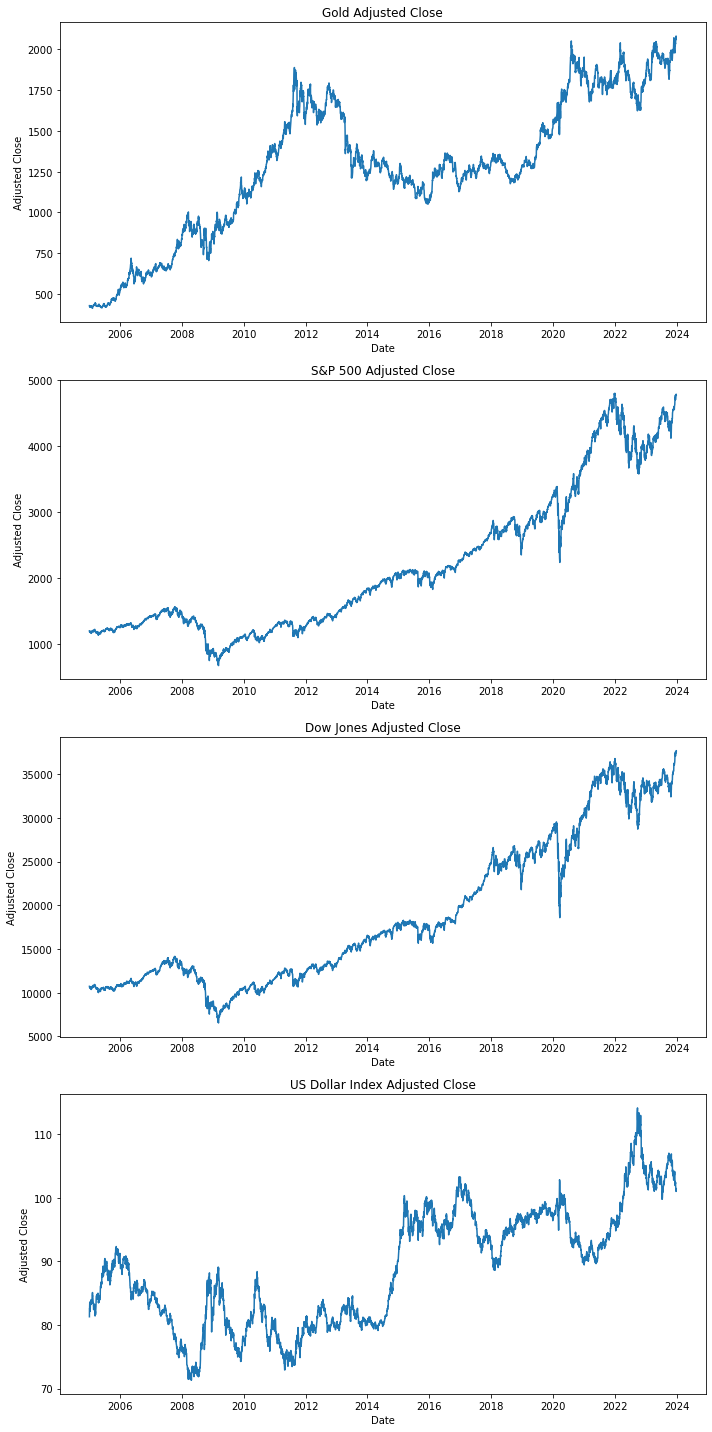

In [418]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Plot each data series on a separate subplot
axes[0].plot(Gold_Adj_close)
axes[0].set_title('Gold Adjusted Close')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Adjusted Close')

axes[1].plot(SP500_Adj_close)
axes[1].set_title('S&P 500 Adjusted Close')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Adjusted Close')

axes[2].plot(Dow_Jones_Adj_close)
axes[2].set_title('Dow Jones Adjusted Close')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Adjusted Close')

axes[3].plot(US_Dollar_Index_Adj_close)
axes[3].set_title('US Dollar Index Adjusted Close')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Adjusted Close')


# Adjust layout for better viewing
plt.tight_layout()
plt.show()



In [407]:
df_Price = pd.DataFrame({'Gold':Gold_Adj_close, 'Dollar Index':US_Dollar_Index_Adj_close,'SP500': SP500_Adj_close, 'Dow Jones':Dow_Jones_Adj_close})

<AxesSubplot:>

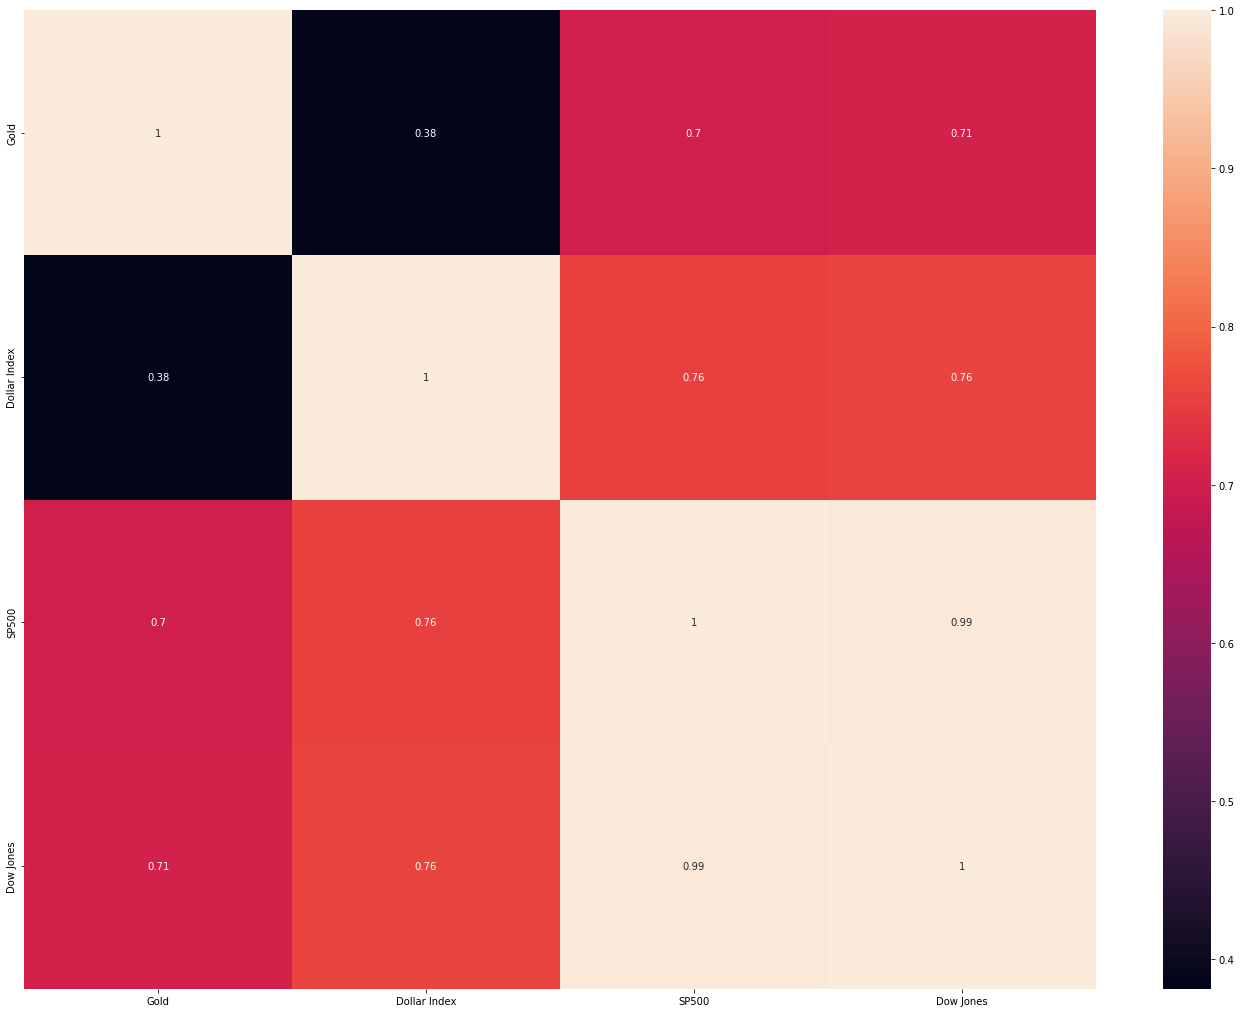

In [408]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_Price.corr(), annot=True) 

From the correlation plot, it shows clearly that there exist a strong postive correlation between Gold spot price, SP500 and Dow Jones, but there is a week correlation between Gold and Dollar index. With this, it is safe to drop the dollar index dataset.

In [15]:
#Creating a function to compute daily return 
def compute_daily_returns(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

In [17]:
Gold_return = compute_daily_returns(Gold_Adj_close)
SP500_return = compute_daily_returns(SP500_Adj_close)
Dow_Jones_return = compute_daily_returns(Dow_Jones_Adj_close)

Text(0, 0.5, 'Return')

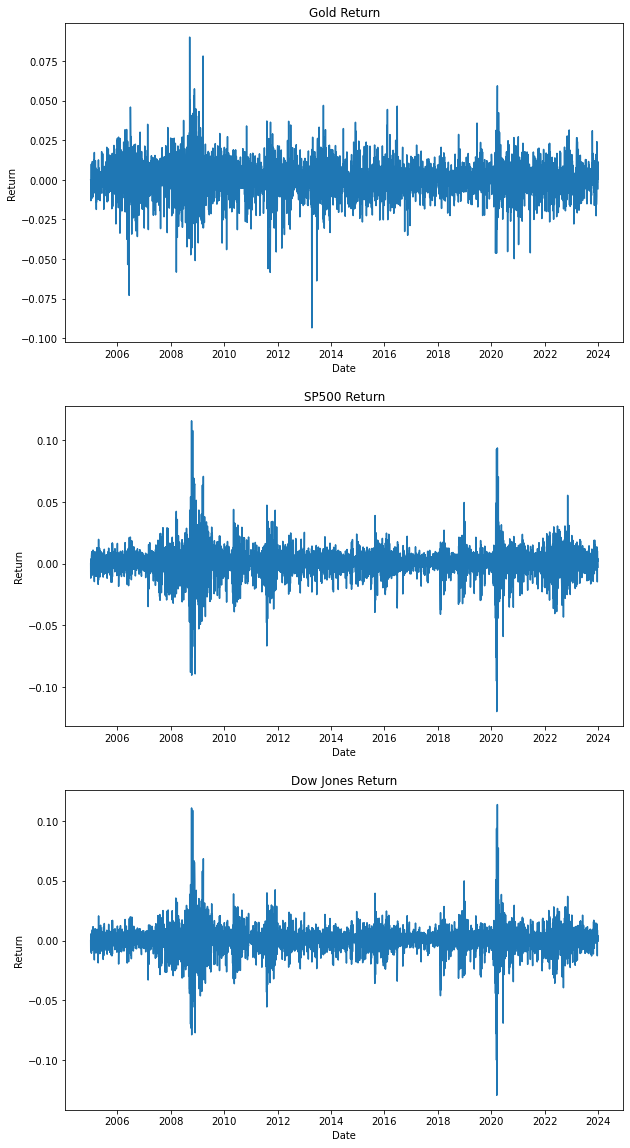

In [18]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Plot each data series on a separate subplot
axes[0].plot(Gold_return)
axes[0].set_title('Gold Return')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Return')

axes[1].plot(SP500_return)
axes[1].set_title('SP500 Return')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Return')

axes[2].plot(Dow_Jones_return)
axes[2].set_title('Dow Jones Return')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Return')

### Observation:

In [19]:
df_return = pd.DataFrame({'Gold':Gold_return, 'SPY':SP500_return, 'Dow_Jones':Dow_Jones_return})

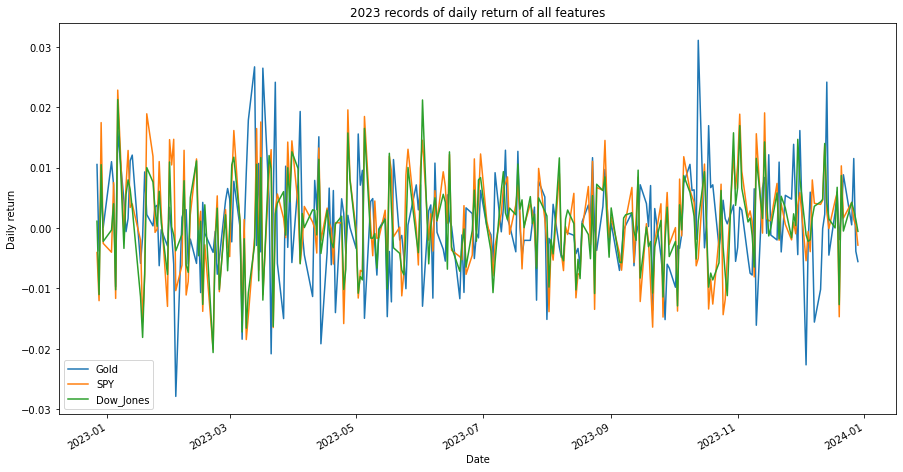

In [20]:
returns = df_return[-254:].plot(title='2023 records of daily return of all features',figsize=(15,8))

returns.set_ylabel('Daily return')
returns.legend(loc='lower left')
plt.show()

## Statistical Analysis

### Mean:


### Standard Deviation:

### Kurtosis:


In [21]:
import matplotlib.pyplot as plt

def plot_statistics_and_histogram(data, column_name):
    # Ensure column_name is in the DataFrame
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Computing mean, standard deviation, and kurtosis
    mean = data[column_name].mean()
    std = data[column_name].std()
    kurt = data[column_name].kurtosis()
    
    # Printing statistics
    print(f'Mean for {column_name}: {mean}')
    print(f'Standard Deviation for {column_name}: {std}')
    print(f'Kurtosis for {column_name}: {kurt}')
    
    # Plotting Histogram
    plt.figure(figsize=(10, 6))
    data[column_name].hist(bins=20)
    
    # Drawing lines for mean and standard deviations
    plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
    plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
    plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
    
    plt.title(f"Mean, Standard Deviation, and Kurtosis of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean for Gold: 0.00039218269677160274
Standard Deviation for Gold: 0.011212444424907137
Kurtosis for Gold: 5.428039005909465


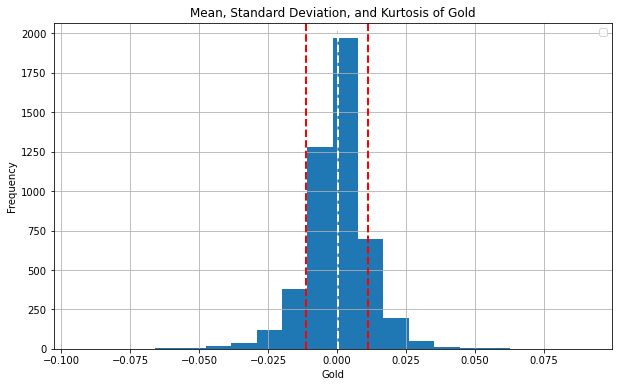

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean for SPY: 0.00036423338312537734
Standard Deviation for SPY: 0.012261327785285332
Kurtosis for SPY: 12.610430582612135


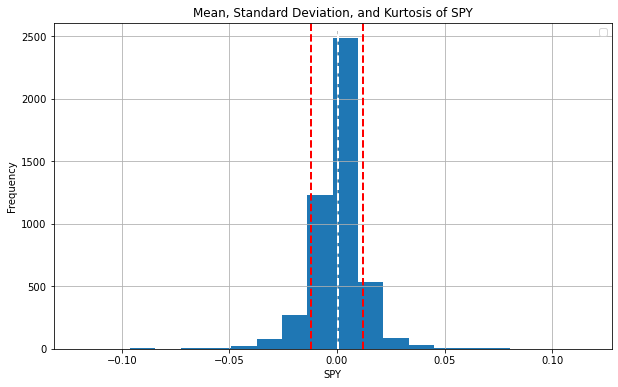

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean for Dow_Jones: 0.00033088138239196986
Standard Deviation for Dow_Jones: 0.011612737694434718
Kurtosis for Dow_Jones: 15.634117238525198


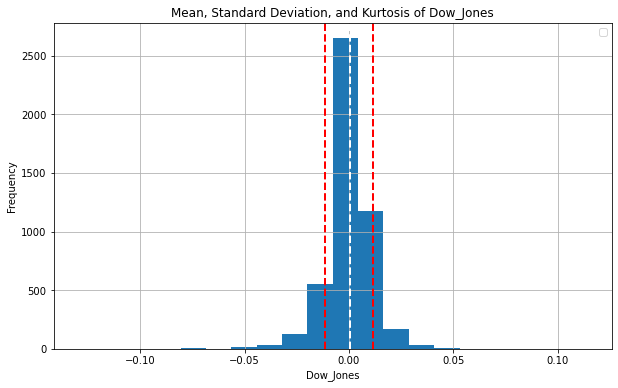

In [22]:
plot_statistics_and_histogram(df_return, 'Gold')
plot_statistics_and_histogram(df_return, 'SPY')
plot_statistics_and_histogram(df_return, 'Dow_Jones')

## Technical Indicators

### Moving Average (MA)

Moving Average: is a time series trend indicator that is derived by adding up data points with a specific specifed time period and dividing the total respective data point within the period. This means that as new data points are added, the oldest data points are dropped, making the average "move" over time.

MA = (A1 + A2 + ... + An)/n

### Exponential Moving Average (EMA)

Exponential Moving Average (EMA) is a type of moving average that places a greater weight on the most recent data points. Unlike the simple moving average (SMA) that assigns equal weight to all values, EMA provides a more responsive way to analyze data trends over time.
The formula for calculating the weighting multiplier is as follows:

Weighting Multiplier = [2 / (Selected Time Period + 1)]

EMA = Current EMA = [Closing Price – EMA (Previous Time Period)] x Weighting Multiplier + EMA (Previous Time Period)


###  Rate of Change (RC):

RC is the rate of change of variable over a specific period

RC = (D2 - D1)/T

D represent distant point

T represent time for change to occur

### Price Momentum (MOM):

Price momentum is measured by continually taking price differences for a fixed time interval. 

Momentum=V−Vx

where:

V = Latest price

Vx = Closing price

x = Number of days ago

### Relative Strength Index (RSI)

RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]

### Stochastic Oscillator (STOK):

In [36]:
# calculation of rate of change

def RC(df, n=15):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    RC = pd.Series(((M / N) * 100), name="RC_" + str(15))
    return RC

# Calculating stochastic oscillator

def STOK(close, low, high, n=15):
    STOK = (
        (close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())
    ) * 100
    return STOK


def STOD(close, low, high, n=15):
    STOK = (
        (close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())
    ) * 100
    STOD = STOK.rolling(3).mean()
    return STOD

# Calculating realtive strength Index

def RSI(df, periods=15):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

# Calculation of price momentum
def MOM(df, n=15):
    MOM = pd.Series(df.diff(n), name="Momentum_" + str(n))
    return MOM

# Calculating Moving Average

def EMA(df, n=15):
    EMA = pd.Series(df.ewm(span=n, min_periods=n).mean(), name="EMA_" + str(n))
    return EMA

def SMA(df, n=15):
    SMA = df.rolling(window=n, min_periods=n, center=False).mean()
    return SMA

# Calculating Standard deviation
def Stdev(df, n=15):
    STDEV = df.rolling(n).std()
    return STDEV

In [37]:
# Rate of Change
data['RC15'] = RC(data["Gold_Adj Close"])

# stochastic oscillator
data['SK15'] = STOK(data["Gold_Adj Close"], data["Gold_Low"], data["Gold_High"], 15)
data['SD15'] = STOD(data["Gold_Adj Close"], data["Gold_Low"], data["Gold_High"], 15)

# Momentum 
data['MOM15'] = MOM(data["Gold_Adj Close"])

# Relative Strength
data['RSI'] = RSI(data["Gold_Adj Close"])

# Standard deviation
data['STDEV'] = Stdev(data["Gold_Adj Close"])

# Open_Close
data['Open_Close'] = data.Gold_Open - data.Gold_Close

# High_low
data['High_Low'] = data.Gold_High - data.Gold_Low

# Exponential Moving Average 
data['EMA15'] = EMA(data["Gold_Adj Close"])

# Simple Moving Average 
data['MA15'] = SMA(data["Gold_Adj Close"])

In [38]:
Gold_Data = data.dropna(axis=0)

In [39]:
Gold_Data.describe()

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Adj Close,Gold_Volume,SP500_Open,SP500_High,SP500_Low,SP500_Close,...,RC15,SK15,SD15,MOM15,RSI,STDEV,Open_Close,High_Low,EMA15,MA15
count,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,...,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000
mean,1286.656308,1293.205068,1279.725253,1286.532990,1286.532990,4928.810555,2196.069229,2208.562904,2182.749958,2196.494934,...,0.545425,53.954333,53.946644,5.068545,52.266858,19.497085,0.123319,13.479815,1284.150259,1284.140147
std,419.679216,421.848870,417.403100,419.630198,419.630198,26718.289825,1088.684288,1094.435007,1082.678371,1088.899229,...,4.063689,32.468332,30.433994,52.951916,11.562473,12.061370,12.332733,12.612660,419.084484,419.322682
min,412.000000,413.600006,410.100006,412.600006,412.600006,0.000000,679.280029,695.270020,666.789978,676.530029,...,-18.137525,-25.342330,-2.245502,-281.199951,17.858917,1.697844,-73.500000,-1.300049,418.420415,418.966665
25%,1053.674957,1061.650024,1047.174988,1053.999969,1053.999969,34.000000,1303.529968,1310.705017,1295.272522,1304.324982,...,-1.961587,24.201837,26.098285,-24.325027,44.522740,11.556578,-5.099976,5.099976,1043.811634,1050.465002
50%,1283.099976,1287.450012,1278.549988,1283.049988,1283.049988,131.000000,1916.600037,1928.760010,1899.660034,1917.804993,...,0.462893,55.824470,55.489163,5.350006,51.797703,16.716459,0.000000,11.000000,1281.878698,1282.406665
75%,1650.900024,1660.425018,1640.000000,1650.024994,1650.024994,449.250000,2845.765076,2862.449951,2826.777588,2847.232605,...,2.947935,85.233469,83.000315,35.700027,60.314253,24.051428,4.500000,18.300049,1656.228350,1651.900004
max,2081.600098,2130.199951,2066.500000,2081.899902,2081.899902,386334.000000,4804.509766,4818.620117,4780.979980,4796.560059,...,18.804806,124.157316,111.060867,269.699951,86.145274,92.805935,117.599976,149.400024,2042.689534,2030.633325


In [40]:
Gold_Data.columns

Index(['Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adj Close',
       'Gold_Volume', 'SP500_Open', 'SP500_High', 'SP500_Low', 'SP500_Close',
       'SP500_Adj Close', 'SP500_Volume', 'Dow_Jones_Open', 'Dow_Jones_High',
       'Dow_Jones_Low', 'Dow_Jones_Close', 'Dow_Jones_Adj Close',
       'Dow_Jones_Volume', 'US_Dollar_Index_Open', 'US_Dollar_Index_High',
       'US_Dollar_Index_Low', 'US_Dollar_Index_Close',
       'US_Dollar_Index_Adj Close', 'US_Dollar_Index_Volume', 'RC15', 'SK15',
       'SD15', 'MOM15', 'RSI', 'STDEV', 'Open_Close', 'High_Low', 'EMA15',
       'MA15'],
      dtype='object')

In [41]:
#Target column
Gold_Data_Target =pd.DataFrame(Gold_Data['Gold_Adj Close'])

#Feature columns
Gold_Data_Features = Gold_Data[["Gold_Volume", "SP500_Volume", "SP500_Adj Close", "Dow_Jones_Volume", "Dow_Jones_Adj Close",
                                "RC15", "SK15", "SD15", "MOM15", "RSI", "STDEV", "Open_Close", 
                                "High_Low", "EMA15", "MA15"]]

In [42]:
Gold_Data_Features.tail()

,Gold_Volume,SP500_Volume,SP500_Adj Close,Dow_Jones_Volume,Dow_Jones_Adj Close,RC15,SK15,SD15,MOM15,RSI,STDEV,Open_Close,High_Low,EMA15,MA15
Date,,,,,,,,,,,,,,,
2023-12-22,202.0,3.046770e+09,4754.629883,252970000.0,37385.968750,1.630360,52.899564,44.179583,-13.899902,62.077163,24.033350,-1.400146,16.500000,2024.045432,2019.073348
2023-12-26,64.0,2.513910e+09,4774.750000,212420000.0,37545.328125,1.966805,88.794018,60.998375,34.099976,62.280352,26.069318,1.800049,6.600098,2028.314747,2021.346680
2023-12-27,586.0,2.748450e+09,4781.580078,245530000.0,37656.519531,2.531391,100.000000,80.564527,63.399902,66.416254,30.361100,-14.599854,17.099854,2035.012891,2025.573340
2023-12-28,338.0,2.698860e+09,4783.350098,199550000.0,37710.101562,2.167588,88.067551,92.287189,43.399902,63.893748,32.831566,7.700195,20.800049,2039.873768,2028.466667
2023-12-29,47.0,3.126060e+09,4769.830078,234570000.0,37689.539062,3.207719,77.827128,88.631559,32.499878,60.377576,33.985037,5.600098,6.799805,2042.689534,2030.633325


In [43]:
Gold_Data_Target.tail()

,Gold_Adj Close
Date,
2023-12-22,2057.100098
2023-12-26,2058.199951
2023-12-27,2081.899902
2023-12-28,2073.899902
2023-12-29,2062.399902


## Feature Scaling

Explanation:Normalizing/ feture scaling the feature varibales helps to ..... 
Formula

This will be carried out using sklearn MinMaxscaler function.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(Gold_Data_Features)

In [45]:
Normalized_Data = pd.DataFrame(columns=Gold_Data_Features.columns, data=feature_minmax_transform_data, index=Gold_Data_Features.index)
Normalized_Data.head()

,Gold_Volume,SP500_Volume,SP500_Adj Close,Dow_Jones_Volume,Dow_Jones_Adj Close,RC15,SK15,SD15,MOM15,RSI,STDEV,Open_Close,High_Low,EMA15,MA15
Date,,,,,,,,,,,,,,,
2005-01-26,0.000052,0.075619,0.120761,0.263040,0.126802,0.492872,0.838412,0.609193,0.507533,0.476383,0.011348,0.384615,0.008627,0.003606,0.002788
2005-01-27,0.173226,0.072296,0.120878,0.287886,0.125801,0.525046,0.789468,0.685730,0.509893,0.458351,0.011089,0.384615,0.008627,0.003777,0.002776
2005-01-28,0.106856,0.076174,0.120103,0.385983,0.124511,0.535556,0.709192,0.824023,0.519150,0.443047,0.010810,0.386185,0.031852,0.003881,0.002974
2005-01-31,0.017749,0.079751,0.122509,0.319145,0.126525,0.508408,0.384516,0.624395,0.515702,0.334855,0.007670,0.406594,0.056404,0.003639,0.003094
2005-02-01,0.003782,0.079956,0.124485,0.303433,0.128514,0.483911,0.298457,0.408443,0.513523,0.311395,0.005306,0.391942,0.029197,0.003350,0.003164


In [46]:
Normalized_Data.shape

(4756, 15)

In [47]:
Gold_Data_Target.shape

(4756, 1)

In [48]:
Gold_Data_Target = Gold_Data_Target.shift(-1)
Val_target = Gold_Data_Target[-100:-1]
Gold_Data_Target = Gold_Data_Target[:-100]

Val_features = Normalized_Data[-100:-1]
Normalized_Data = Normalized_Data[:-100]

In [49]:
print('validation target shape :', Val_target.shape)
print('validation features shape :', Val_features.shape)

validation target shape : (99, 1)
validation features shape : (99, 15)


In [50]:
print('New features shape :', Normalized_Data.shape)
print('New target shape :', Gold_Data_Target.shape)

New features shape : (4656, 15)
New target shape : (4656, 1)


## Train Test Split

In [243]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(Normalized_Data):
        X_train, X_test = Normalized_Data[:len(train_index)], Normalized_Data[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = Gold_Data_Target[:len(train_index)], Gold_Data_Target[len(train_index): (len(train_index)+len(test_index))]
       

In [244]:
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_train shape :", y_test.shape)

X_train shape : (4233, 15)
X_test shape : (423, 15)
y_train shape : (4233, 1)
y_train shape : (423, 1)


In [245]:
# Metric Scores function
def validate_result(model, model_name):
    predicted = model.predict(Val_features)
    RSME_score = np.sqrt(mean_squared_error(Val_target, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(Val_target, predicted)
    print('R2 score: ', R2_score)
    
  

## Models Implementation

### DecisionTreeRegressor:

In [246]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

DecisionTree = dt.fit(X_train, y_train)

validate_result(DecisionTree, 'Decision Tree Regression')


RMSE:  133.65040859189043
R2 score:  -3.571425561585369


### Support Vector Regressor:

In [247]:
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')


RMSE:  50.14181182344917
R2 score:  0.35655546569775887


### Hyperparameter Tunning of SVR:

In [248]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')


RMSE:  22.81463199237616
R2 score:  0.8667896386281797


### Random Forest Regressor:

In [249]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

RMSE:  92.90403192792823
R2 score:  -1.208921057503194


### Hyperparameter Tunning Random Forest Regressor:

In [250]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

grid_search_RF_feat.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

In [251]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat,'RandomForest GS')

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}
RMSE:  92.28722008726108
R2 score:  -1.1796873268900478


### Lasso & Ridge CV:

In [252]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')


ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')

RMSE:  21.406981918870905
R2 score:  0.8827205406496558
RMSE:  21.971022330317734
R2 score:  0.8764588608084521


### Bayesian Ridge:

In [253]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')

RMSE:  19.733091113714572
R2 score:  0.9003444906820729


### Gradient Boosting Regressor:

In [254]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')

RMSE:  58.87560133073164
R2 score:  0.11288120107035582


### Stochastic Gradient Regressor:

In [255]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')

RMSE:  23.028744901426066
R2 score:  0.8642775756461623


### MODEL COMPARISM VIEW

In [256]:
# Save all soultion models
solution_model = {}
solution_model['Decision Tree'] = DecisionTree
solution_model['SVR'] = lsvr_grid_search_feat
solution_model['Random Forest'] = random_forest_clf_feat
solution_model['LassoCV'] = lasso_clf_feat
solution_model['RidgeCV'] = ridge_clf_feat
solution_model['Gradient Boosting'] = GB_feat
solution_model['Bayesian'] = bay_feat
solution_model['Stochastic Gradient'] = sgd_feat

In [257]:
def model_review(models, val_features, val_target):
    rmse_scores = {}  # Dictionary to store RMSE scores
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
    axes = axes.flatten()

    for i, (name, models) in enumerate(models.items()):
        predicted = models.predict(val_features)
        RSME_score = np.sqrt(mean_squared_error(val_target, predicted))
        rmse_scores[name] = RSME_score  # Store the RMSE score

        ax = axes[i]
        ax.plot(val_target.index, predicted, 'g', label='Predict')
        ax.plot(val_target, 'b', label='Actual')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.set_ylabel('Price')
        ax.set_title(f"{name}'s RMSE Error: {RSME_score:.2f}")
        ax.legend(loc='upper right')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    return rmse_scores



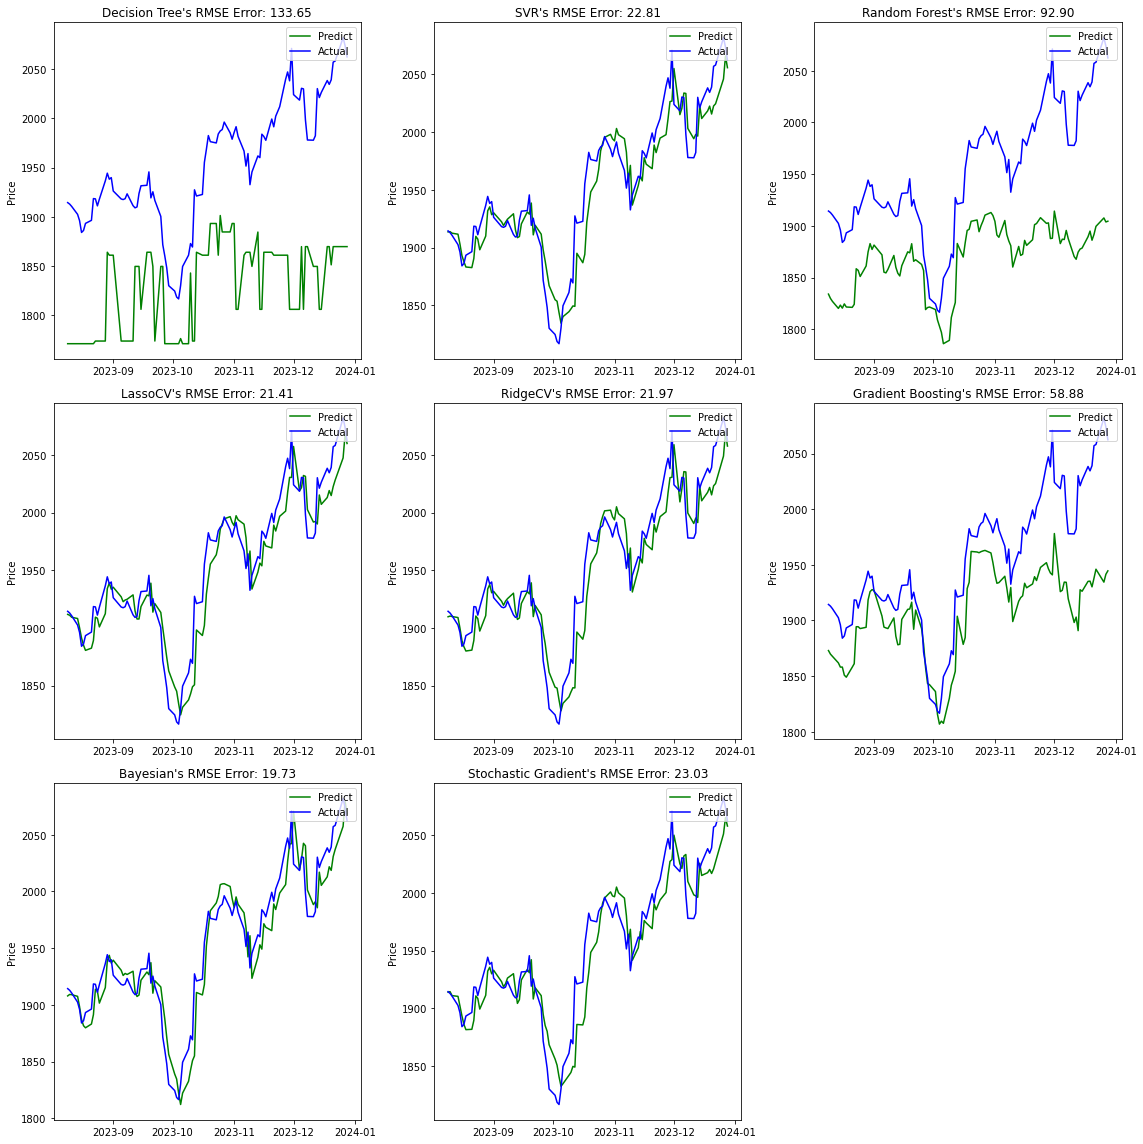

In [258]:
rmse_scores_nonfeatured = model_review(solution_model, Val_features, Val_target)
rmse_df = pd.DataFrame(list(rmse_scores_nonfeatured.items()), columns=['Model', 'NonFeatured_RMSE'])

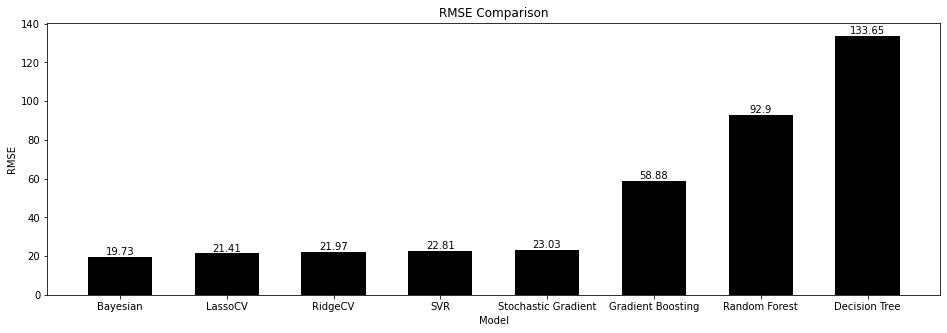

In [259]:
model_names = rmse_df['Model'].values
model_values = rmse_df['NonFeatured_RMSE'].values

# Sort the models based on their RMSE
indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]

# Plotting
fig = plt.figure(figsize=(16, 5))
bars = plt.bar(np.arange(8), values, width=0.6, align="center", color='#000000')

# Adding the text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

plt.xticks(np.arange(8), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')   
plt.show()

## Feature Selection

We are going to be implementing feature selection in our project to better enhance the Model performance.

In [279]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(bay_feat)
sfm.fit(Normalized_Data, Gold_Data_Target.values.ravel())
display(Normalized_Data.head())
sup = sfm.get_support()
zipped = zip(Normalized_Data,sup)
print(*zipped)

,Gold_Volume,SP500_Volume,SP500_Adj Close,Dow_Jones_Volume,Dow_Jones_Adj Close,RC15,SK15,SD15,MOM15,RSI,STDEV,Open_Close,High_Low,EMA15,MA15
Date,,,,,,,,,,,,,,,
2005-01-26,0.000052,0.075619,0.120761,0.263040,0.126802,0.492872,0.838412,0.609193,0.507533,0.476383,0.011348,0.384615,0.008627,0.003606,0.002788
2005-01-27,0.173226,0.072296,0.120878,0.287886,0.125801,0.525046,0.789468,0.685730,0.509893,0.458351,0.011089,0.384615,0.008627,0.003777,0.002776
2005-01-28,0.106856,0.076174,0.120103,0.385983,0.124511,0.535556,0.709192,0.824023,0.519150,0.443047,0.010810,0.386185,0.031852,0.003881,0.002974
2005-01-31,0.017749,0.079751,0.122509,0.319145,0.126525,0.508408,0.384516,0.624395,0.515702,0.334855,0.007670,0.406594,0.056404,0.003639,0.003094
2005-02-01,0.003782,0.079956,0.124485,0.303433,0.128514,0.483911,0.298457,0.408443,0.513523,0.311395,0.005306,0.391942,0.029197,0.003350,0.003164


('Gold_Volume', False) ('SP500_Volume', False) ('SP500_Adj Close', False) ('Dow_Jones_Volume', False) ('Dow_Jones_Adj Close', False) ('RC15', False) ('SK15', False) ('SD15', False) ('MOM15', False) ('RSI', False) ('STDEV', False) ('Open_Close', False) ('High_Low', False) ('EMA15', True) ('MA15', True)


In [280]:
feature_selected = Normalized_Data[["EMA15", "MA15"]]
feature_selected_Val = Val_features[["EMA15", "MA15"]]

In [281]:
feature_selected.head()

,EMA15,MA15
Date,,
2005-01-26,0.003606,0.002788
2005-01-27,0.003777,0.002776
2005-01-28,0.003881,0.002974
2005-01-31,0.003639,0.003094
2005-02-01,0.003350,0.003164


In [282]:
feature_selected_Val.head()

,EMA15,MA15
Date,,
2023-08-09,0.937183,0.948848
2023-08-10,0.935163,0.946618
2023-08-11,0.933279,0.944492
2023-08-14,0.931454,0.942436
2023-08-15,0.929233,0.939971


In [283]:
 for train_index1, test_index1 in ts_split.split(feature_selected):
        X_train1, X_test1 = feature_selected[:len(train_index1)], feature_selected[len(train_index1): (len(train_index1)+len(test_index1))]
        y_train1, y_test1 = Gold_Data_Target[:len(train_index1)].values.ravel(), Gold_Data_Target[len(train_index1): (len(train_index1)+len(test_index))].values.ravel()
     

## Training the Models with Featured Selected Data

In [284]:
def feature_selected_result(model, model_name):
    predicted = model.predict(feature_selected_Val)
    
    RSME_score = np.sqrt(mean_squared_error(Val_target, predicted))
    R2_score = r2_score(Val_target, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RSME_score)
    print('R2 score: ', R2_score)

### Decision Tree with Featured Selected Data

In [285]:
dt = DecisionTreeRegressor(random_state=0)
FS_DecisionTree = dt.fit(X_train1, y_train1)
feature_selected_result(FS_DecisionTree, 'Decision Tree')

Decision Tree

RMSE:  67.63868741226102
R2 score:  -0.17085041184695005


### Support Vector with Featured Selected Data

In [286]:
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
FS_linear_svr = svr_lin.fit(X_train1,y_train1)
feature_selected_result(FS_linear_svr,'Linear SVR')

Linear SVR

RMSE:  110.6197489089867
R2 score:  -2.131672995929827


In [287]:
# Hyperparameter Tunning SVR
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 20.0],
    'epsilon':[0, 0.1, 0.4, 0.6, 0.9],
}

FS_lsvr_grid_search = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

FS_lsvr_grid_search.fit(X_train1, y_train1)

feature_selected_result(FS_lsvr_grid_search,'Linear SVR GS All Feat')

Linear SVR GS All Feat

RMSE:  38.50840175542813
R2 score:  0.6204910179754427


## Random Forest Regressor with Featured Selected Data

In [288]:
rf_cl = RandomForestRegressor(n_estimators=10, random_state=0)
FS_random_forest = rf_cl.fit(X_train1,y_train1)
feature_selected_result(FS_random_forest,'Random Forest')

Random Forest

RMSE:  56.716606841007525
R2 score:  0.17675035525413374


In [289]:
# Hyperparameter Tunning Random Forest
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 4, 5,6],
}

FS_grid_search_RF = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

FS_grid_search_RF.fit(X_train1, y_train1)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

In [290]:
print(FS_grid_search_RF.best_params_)
feature_selected_result(FS_grid_search_RF,'RandomForest GS')

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 50}
RandomForest GS

RMSE:  56.049086906702776
R2 score:  0.1960146141643513


## Lasso & Ridge CV with Featured Selected Data

In [291]:
lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

FS_lasso_clf = lasso_clf.fit(X_train1,y_train1)
feature_selected_result(FS_lasso_clf,'LassoCV')


FS_ridge_clf = ridge_clf.fit(X_train1,y_train1)
feature_selected_result(FS_ridge_clf,'RidgeCV')

LassoCV

RMSE:  34.803031321793426
R2 score:  0.6900117620459336
RidgeCV

RMSE:  33.43205637980851
R2 score:  0.7139530958495582


## Bayesian Ridge with Featured Selected Data

In [292]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
FS_bay = bay.fit(X_train1,y_train1)
feature_selected_result(FS_bay,'Bayesian')

Bayesian

RMSE:  25.609758316615228
R2 score:  0.8321497352043468


## Gradient Boosting with Featured Selected Data

In [293]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=5, random_state=0, loss='ls')
FS_GB = regr.fit(X_train1,y_train1)
feature_selected_result(FS_GB,'Gradient Boosting')

Gradient Boosting

RMSE:  54.19983240691021
R2 score:  0.24819197350686617


## Stochastic Gradient with Featured Selected Data

In [294]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
FS_sgd = sgd.fit(X_train1,y_train1)
feature_selected_result(FS_sgd,'SGD')

SGD

RMSE:  38.61490807228429
R2 score:  0.6183888273422316


## Model Comparism with Featured Selected Data

In [295]:
Featured_models = {}
Featured_models['Decision Tree'] = FS_DecisionTree
Featured_models['SVR'] = FS_linear_svr
Featured_models['Random Forest'] = FS_lsvr_grid_search
Featured_models['LassoCV'] = FS_lasso_clf
Featured_models['RidgeCV'] = FS_ridge_clf
Featured_models['Gradient Boosting'] = FS_GB
Featured_models['Bayesian'] = FS_bay
Featured_models['Stochastic Gradient'] = FS_sgd

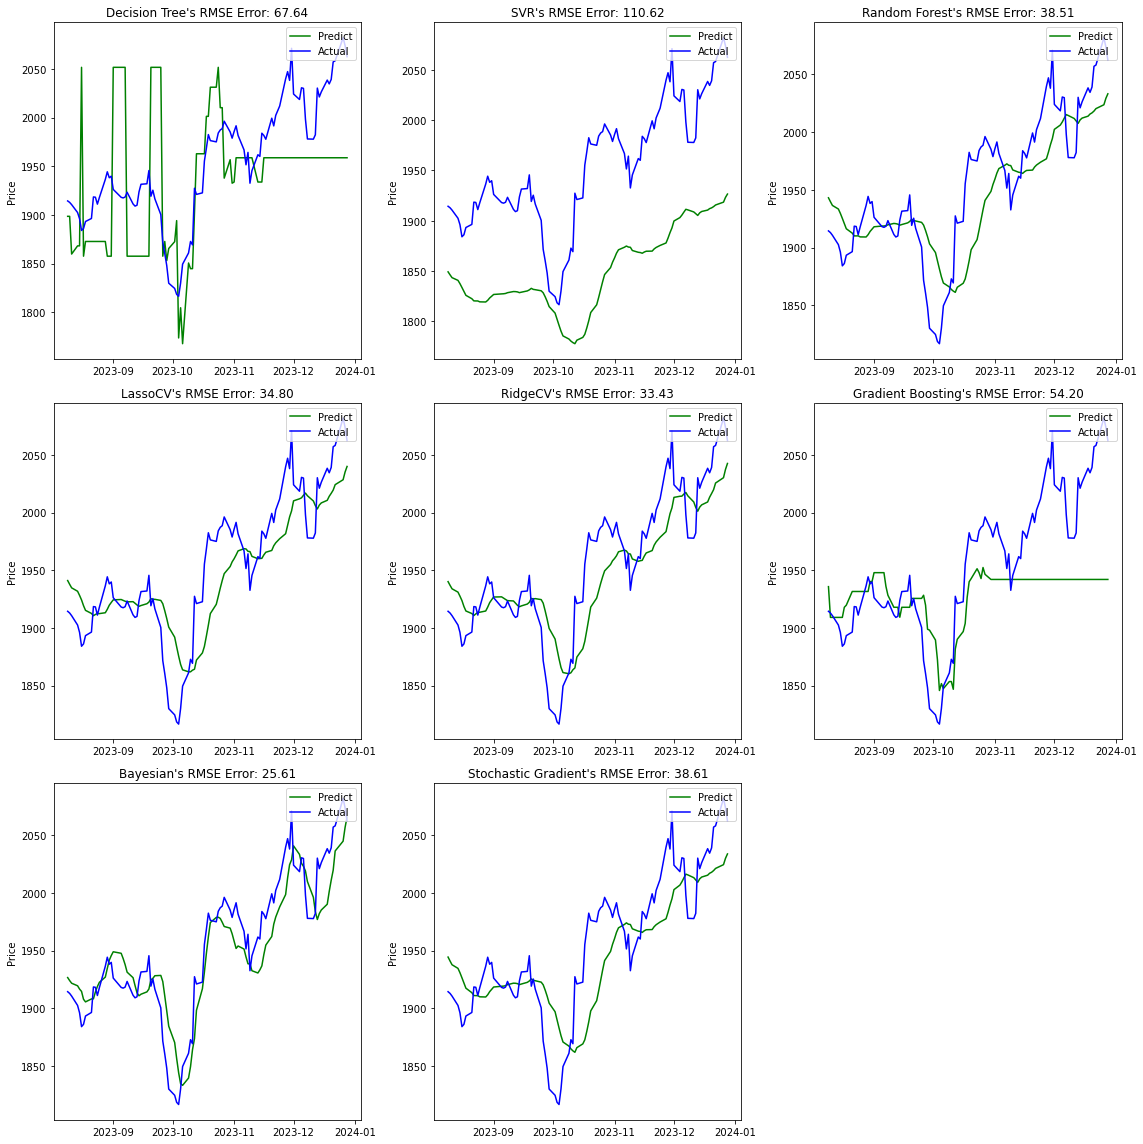

In [296]:
rmse_scores_featured = model_review(Featured_models,feature_selected_Val,Val_target)

In [297]:
# Convert the rmse_scores_featured dictionary to a DataFrame
featured_rmse_df = pd.DataFrame(list(rmse_scores_featured.items()), columns=['Model', 'Featured_RMSE'])

# Merge with the existing rmse_df DataFrame
RMSE_merged_df = rmse_df.merge(featured_rmse_df, on='Model', how='left')

RMSE_merged_df

,Model,NonFeatured_RMSE,Featured_RMSE
0,Decision Tree,133.650409,67.638687
1,SVR,22.814632,110.619749
2,Random Forest,92.904032,38.508402
3,LassoCV,21.406982,34.803031
4,RidgeCV,21.971022,33.432056
5,Gradient Boosting,58.875601,54.199832
6,Bayesian,19.733091,25.609758
7,Stochastic Gradient,23.028745,38.614908


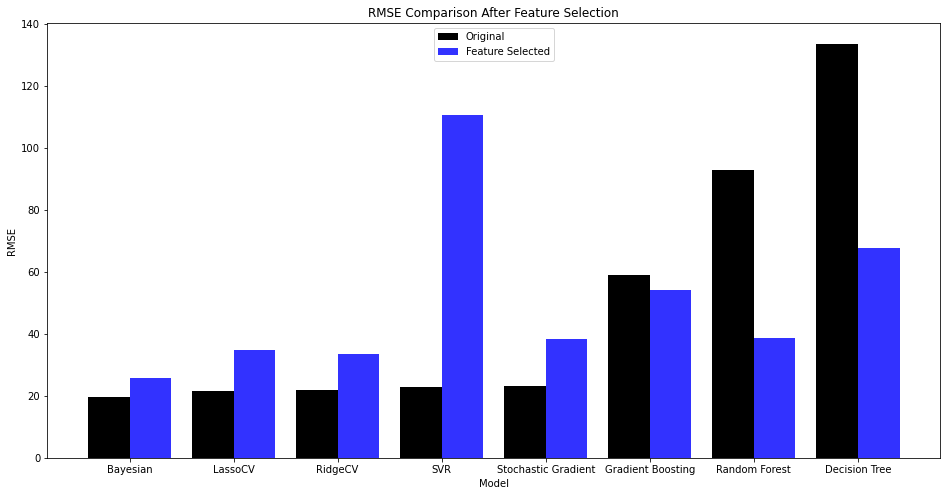

In [298]:
# Sort the DataFrame by 'NonFeatured_RMSE'
sorted_df = merged_df.sort_values(by='NonFeatured_RMSE').head(8)

# Extract model names and RMSE values
model_names = sorted_df['Model'].values
non_featured_rmse = sorted_df['NonFeatured_RMSE'].values
featured_rmse = sorted_df['Featured_RMSE'].values

# Plotting
fig = plt.figure(figsize=(16, 8))
bar_width = 0.4
index = np.arange(len(model_names))

plt.bar(index - bar_width/2, non_featured_rmse, width=bar_width, align="center", color='#000000', label="Original")
plt.bar(index + bar_width/2, featured_rmse, width=bar_width, align="center", color='#3232ff', label="Feature Selected")

plt.xticks(index, model_names)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison After Feature Selection')
plt.legend(loc='upper center')

plt.show()

Orignal Model RMSE looks better for majority of the models when compared to Feature Selected modeld. Furthermore, Bayesian, LassoCV and RidgeCV maintained their performance as the best 3 models with lower RSME. 

## Ensemble 

In order to better improve the performace of the model, we are going to enseble the top 3 performing model which are Bayesian, LassoCV, and RidgeCV.

In [265]:
#Using the Non featured selected best performing model for Ensemble operations
ensemble_non_FS = [bay_feat, lasso_clf_feat, ridge_clf_feat]

In [271]:
def ensemble_predict(ensemble_models, X):
    """Predicts the average output of the ensemble models."""
    # Predict with each model and store predictions
    predictions = [model.predict(X).flatten() for model in ensemble_models]

    # Calculate the average of predictions
    avg_prediction = np.mean(predictions, axis=0)
    return avg_prediction

In [272]:
# Predict with the ensemble
ensemble_prediction = ensemble_predict(ensemble_non_FS, X_test) 

In [275]:
# Evaluate the ensemble model
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_prediction))  
print("Non FS Ensemble RMSE:", ensemble_rmse)

Non FS Ensemble RMSE: 19.116925218406255


In [278]:
#Using the featured selected best performing model for Ensemble operations
ensemble_FS = [FS_bay, FS_lasso_clf, FS_ridge_clf]

In [299]:
# Predict with the ensemble
ensemble_prediction_FS = ensemble_predict(ensemble_FS, X_test1) 

In [300]:
# Evaluate the featured selected ensemble model
FS_ensemble_rmse = np.sqrt(mean_squared_error(y_test1, ensemble_prediction_FS))  
print("FS Ensemble RMSE:", FS_ensemble_rmse)

FS Ensemble RMSE: 30.502166849831298


## Model Training Cycle

The function train_multipletimes is designed to train and evaluate a machine learning regression model 10 multiple times, each time using a different number of splits for the Time Series Split. The function aims to assess the model's performance over various temporal divisions of the data. We are going to be applying this on non featured selected models for Bayesian Model, lasso CV, Ridge CV and the non featured selected ensemble model. 

In [310]:
def train_reg_multipletimes(model, times, features, target, validation_X, validation_y):
    # Initialize total RMSE and R2 scores
    total_rmse, total_r2 = 0, 0

    # Function to calculate RMSE and R2 metrics
    def calculate_metrics(actual, predicted):
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        r2 = r2_score(actual, predicted)
        return rmse, r2

    # Loop over the specified number of times
    for i in range(times):
        # Create TimeSeriesSplit with increasing number of splits
        tscv = TimeSeriesSplit(n_splits=i+2)
        # Clone the original model to ensure a fresh model for each iteration
        reg = clone(model)

        # Loop over each split in TimeSeriesSplit
        for train_index, test_index in tscv.split(features):
            # Split the data into training and testing sets
            X_train, y_train = features.iloc[train_index], target.iloc[train_index]
            # Fit the model on the training data
            reg.fit(X_train, y_train)

        # Predict on the validation data
        predicted = reg.predict(validation_X)
        # Calculate RMSE and R2 for the validation data
        rmse, r2 = calculate_metrics(validation_y, predicted)

        # Print the metrics for the current iteration
        print(f'From 0 to {len(validation_y)}\nRMSE: {rmse}\nR2 score: {r2}\n---------------------')

        # Accumulate the total RMSE and R2 scores
        total_rmse += rmse
        total_r2 += r2

    # Return the average RMSE and R2 scores across all iterations
    return total_rmse / times, total_r2 / times

In [312]:
# Bayesian model
train_reg_multipletimes(bay_feat, 10, Normalized_Data, Gold_Data_Target, Val_features, Val_target)

From 0 to 99
RMSE: 19.3281148651339
R2 score: 0.9043929172979798
---------------------
From 0 to 99
RMSE: 19.53383578510518
R2 score: 0.9023468772763849
---------------------
From 0 to 99
RMSE: 19.406847780877687
R2 score: 0.9036124215393452
---------------------
From 0 to 99
RMSE: 19.70187429716221
R2 score: 0.9006595418886614
---------------------
From 0 to 99
RMSE: 19.411779413094482
R2 score: 0.9035634276491584
---------------------
From 0 to 99
RMSE: 19.535692587492434
R2 score: 0.902328311422626
---------------------
From 0 to 99
RMSE: 19.618966099603643
R2 score: 0.9014938593552232
---------------------
From 0 to 99
RMSE: 19.707073664096797
R2 score: 0.9006071026497242
---------------------
From 0 to 99
RMSE: 19.733091113714572
R2 score: 0.9003444906820729
---------------------
From 0 to 99
RMSE: 19.63514212595125
R2 score: 0.9013313538673366
---------------------


(19.561241773223216, 0.9020680303628513)

In [313]:
# Ridge CV model
train_reg_multipletimes(ridge_clf_feat, 10, Normalized_Data, Gold_Data_Target, Val_features, Val_target)

From 0 to 99
RMSE: 22.254834251503365
R2 score: 0.8732465470521882
---------------------
From 0 to 99
RMSE: 22.45532955672748
R2 score: 0.8709523984827043
---------------------
From 0 to 99
RMSE: 22.203686412714895
R2 score: 0.873828507361565
---------------------
From 0 to 99
RMSE: 21.458451309203692
R2 score: 0.8821559062778142
---------------------
From 0 to 99
RMSE: 21.363381409828605
R2 score: 0.8831977902463388
---------------------
From 0 to 99
RMSE: 21.563080443565127
R2 score: 0.8810039139888378
---------------------
From 0 to 99
RMSE: 21.720070693488097
R2 score: 0.8792649018131602
---------------------
From 0 to 99
RMSE: 21.89751833487945
R2 score: 0.8772840911827223
---------------------
From 0 to 99
RMSE: 21.971022330317734
R2 score: 0.8764588608084521
---------------------
From 0 to 99
RMSE: 21.845612305568515
R2 score: 0.8778651749454965
---------------------


(21.8732987047797, 0.877525809215928)

In [314]:
# Lasso CV model
train_reg_multipletimes(lasso_clf_feat, 10, Normalized_Data, Gold_Data_Target, Val_features, Val_target)

From 0 to 99
RMSE: 21.65120181150377
R2 score: 0.8800293292527412
---------------------
From 0 to 99
RMSE: 21.75223487410858
R2 score: 0.878907055755705
---------------------
From 0 to 99
RMSE: 21.62916890204665
R2 score: 0.8802733764882797
---------------------
From 0 to 99
RMSE: 21.26215413258998
R2 score: 0.8843020683855984
---------------------
From 0 to 99
RMSE: 21.20745610064319
R2 score: 0.8848965809625234
---------------------
From 0 to 99
RMSE: 21.33052025711406
R2 score: 0.8835568441972534
---------------------
From 0 to 99
RMSE: 21.358746944994802
R2 score: 0.8832484617208652
---------------------
From 0 to 99
RMSE: 21.430777109845142
R2 score: 0.8824596689252546
---------------------
From 0 to 99
RMSE: 21.406981918870905
R2 score: 0.8827205406496558
---------------------
From 0 to 99
RMSE: 21.364746886374448
R2 score: 0.8831828585487841
---------------------


(21.43939889380915, 0.8823576784886662)

In [322]:
class EnsembleRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Fit each model in the ensemble
        for model in self.models:
            model.fit(X, y)

    def predict(self, X):
        # Collect predictions from each model
        predictions = [model.predict(X).flatten() for model in self.models]
        # Average the predictions
        avg_prediction = np.mean(predictions, axis=0)
        return avg_prediction

# Instantiate the ensemble model
ensemble_non_FS = EnsembleRegressor([bay_feat, lasso_clf_feat, ridge_clf_feat])


In [337]:
# Non Featured Selected Ensemble model
train_reg_multipletimes(ensemble_non_FS , 10, Normalized_Data, Gold_Data_Target, Val_features, Val_target)

From 0 to 99
RMSE: 20.327968081037874
R2 score: 0.8942454623267659
---------------------
From 0 to 99
RMSE: 20.697437173706074
R2 score: 0.8903662632783114
---------------------
From 0 to 99
RMSE: 20.518636633665558
R2 score: 0.8922522842430796
---------------------
From 0 to 99
RMSE: 20.11677935038283
R2 score: 0.8964314310224768
---------------------
From 0 to 99
RMSE: 20.111220387269714
R2 score: 0.896488662281715
---------------------
From 0 to 99
RMSE: 20.342911586446426
R2 score: 0.8940899205263434
---------------------
From 0 to 99
RMSE: 20.443427996910735
R2 score: 0.8930407096771416
---------------------
From 0 to 99
RMSE: 20.566574545561007
R2 score: 0.8917482318195176
---------------------
From 0 to 99
RMSE: 20.60168003978086
R2 score: 0.8913783622372711
---------------------
From 0 to 99
RMSE: 20.506846021058234
R2 score: 0.89237607868328
---------------------


(20.423348181581932, 0.8932417406095905)

## Cross Validation

In [369]:
def perform_cross_validation(model, X, y, n_splits=5):
    """
    Perform cross-validation on a given model.
    
    Parameters:
    model: The machine learning model to be evaluated.
    X: Feature matrix.
    y: Target vector.
    n_splits: Number of folds for cross-validation.
    """
    kf = KFold(n_splits=n_splits)
    rmse_scores = []
    r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        fold_rmse = np.sqrt(mean_squared_error(y_test, predictions))
        fold_r2 = r2_score(y_test, predictions)

        rmse_scores.append(fold_rmse)
        r2_scores.append(fold_r2)

    average_rmse = np.mean(rmse_scores)
    average_r2 = np.mean(r2_scores)

    return rmse_scores, r2_scores, average_rmse, average_r2


In [388]:
# Bayesian
rmse_scores_bay, r2_scores_bay, avg_rmse_bay, avg_r2_bay = perform_cross_validation(bay_feat, Normalized_Data, Gold_Data_Target, n_splits=5)
print("Cross Validation on Bayesian Model")
print("RMSE scores for each fold:", rmse_scores_bay)
print("R2 scores for each fold:", r2_scores_bay)

Cross Validation on Bayesian Model
RMSE scores for each fold: [12.685526798051216, 19.59585710024326, 16.16859052388306, 11.708845051030567, 20.92432098425735]
R2 scores for each fold: [0.9938855191778038, 0.995848271406489, 0.9929858780649015, 0.9793324453464853, 0.9700887791165331]


In [373]:
# Ridge
rmse_scores_ridge, r2_scores_ridge, avg_rmse_ridge, avg_r2_ridge = perform_cross_validation(ridge_clf_feat, Normalized_Data, Gold_Data_Target, n_splits=5)
print("Cross Validation on Ridge Model")
print("RMSE scores for each fold:", rmse_scores_ridge)
print("R2 scores for each fold:", r2_scores_ridge)

Cross Validation on Ridge Model
RMSE scores for each fold: [15.780203470652737, 20.806647435344683, 17.489533867208465, 12.000459201684025, 22.086969544710243]
R2 scores for each fold: [0.9905383305749617, 0.9953193664208093, 0.9917929806751353, 0.9782901558016623, 0.9666724293732347]


In [374]:
#Lasso
rmse_scores_lasso, r2_scores_lasso, avg_rmse_lasso, avg_r2_lasso = perform_cross_validation(lasso_clf_feat, Normalized_Data, Gold_Data_Target, n_splits=5)
print("Cross Validation on Lasso Model")
print("RMSE scores for each fold:", rmse_scores_lasso)
print("R2 scores for each fold:", r2_scores_lasso)

Cross Validation on Lasso Model
RMSE scores for each fold: [14.35299301841136, 20.58200887541527, 16.941395023727218, 11.575892499956264, 21.6258574255749]
R2 scores for each fold: [0.9921724199045892, 0.995419889564306, 0.9922993510682604, 0.9797991358882648, 0.9680494702215089]


In [385]:
#Ensemble

# Define the ensemble wrapper class
class EnsembleRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Fit each model in the ensemble
        for model in self.models:
            model.fit(X, y)

    def predict(self, X):
        # Use the ensemble_predict function for predictions
        predictions = [model.predict(X).flatten() for model in self.models]
        avg_prediction = np.mean(predictions, axis=0)
        return avg_prediction

# Initialize your ensemble model
ensemble_non_FS_model = EnsembleRegressor([bay_feat, lasso_clf_feat, ridge_clf_feat])

# Now you can use the ensemble model with the cross-validation function
rmse_scores_ensemble, r2_scores_ensemble, avg_rmse_ensemble, avg_r2_ensemble = perform_cross_validation(ensemble_non_FS_model, Normalized_Data, Gold_Data_Target, n_splits=5)
print("Cross Validation on Ensemble Model")
print("RMSE scores for each fold:", rmse_scores_ensemble)
print("R2 scores for each fold:", r2_scores_ensemble)


Cross Validation on Ensemble Model
RMSE scores for each fold: [14.057548746773865, 20.085754320933432, 16.659196584771813, 11.580178713039132, 21.228010713714344]
R2 scores for each fold: [0.9924913515858764, 0.9956380898019399, 0.9925537589240512, 0.9797841735450984, 0.969214232224963]


## Summary

In [390]:
print('Bayesian RMSE: {} // Bayesian R2: {}'.format(avg_rmse_bay, avg_r2_bay))
print('Ridge RMSE: {} // Ridge R2: {}'.format(avg_rmse_ridge, avg_r2_ridge))
print('Lasso RMSE: {} // Lasso R2: {}'.format(avg_rmse_lasso, avg_r2_lasso))
print('Ensemble RMSE: {} // Ensemble R2: {}'.format(avg_rmse_ensemble, avg_r2_ensemble))

Bayesian RMSE: 16.21662809149309 // Bayesian R2: 0.9864281786224425
Ridge RMSE: 17.63276270392003 // Ridge R2: 0.9845226525691608
Lasso RMSE: 17.015629368617006 // Lasso R2: 0.9855480533293859
Ensemble RMSE: 16.722137815846516 // Ensemble R2: 0.9859363212163859
